# Laplace approximation - 02 (Case studies)

# _Josep Fortiana_ $\hskip3cm$ 2023-05-22

***
###### LaTeX macros
$ \def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\cL{\cal L}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\betabinomdist{\operatorname{Beta-Binom}}$
$\def\betadist{\operatorname{Beta}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\dexpdist{\operatorname{DExp}}$
$\def\expdist{\operatorname{Exp}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\halfcauchydist{\operatorname{Cauchy}^{+}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\DeclareMathOperator{\invgammadist}{IG}$
$\def\laplacedist{\operatorname{Laplace}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinom}$
$\def\normaldist{\operatorname{N}}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\tdist{\operatorname{t}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
***

# Case study 1: Tennis - First serve success rate

This example is taken from lectures by [Surya Tapas Tokdar](http://www2.stat.duke.edu/~st118/). 

Data: $\mathbf{x}=(x_1,\dots,x_n)$ on the first serve success rates $\in(0,1)$ of a tennis player from $n$ tournament matches. 

Model:

$$
    X_i\quad \text{i.i.d} \sim X \quad\text{with pdf:}\quad
    g(x\,|\,\theta)=\theta\,(\theta+1)\,x^{\theta-1}\cdot(1-x),\quad x\in(0,1),\; \theta>0.
$$

This is a $\operatorname{Beta}(\theta,2)$ pdf. 

The $\operatorname{Beta}$ family with one fixed parameter is an exponential family, hence a conjugate prior is known to exist. 

However it is not commonly used. There exists a GLM model for beta-distributed response data, but it is based on a different parameterization for the $\operatorname{Beta}$ family (see the `betareg` package). 

Here we assign $\theta$ a $\operatorname{Gamma}(\alpha,\beta)$ prior.

Observed data for a sample of $n=20$ observations is summarized as $\sum_{i=1}^{n}\log x_i=-4.59$ (see below).

## Moments

A straightforward computation gives the $k$-th moment of this distribution:

$$
    \mu_k\equiv\operatorname{E}(X^k)=\dfrac{\theta\,(\theta+1)}{(\theta+k)\,(\theta+k+1)}.
$$

In particular, $\mu_0=1$, i.e., the integral of the pdf is equal to 1 as it should be. Also:

$$
    \mu_1=\operatorname{E}(X)=\dfrac{\theta}{\theta+2},\quad
    \mu_2=\dfrac{\theta\,(\theta+1)}{(\theta+2)\,(\theta+3)},\quad
    \operatorname{var}(X)=\dfrac{2\,\theta}{(\theta+2)^2\,(\theta+3)}.
$$

## Likelihood

For the observed sample of $n$ i.i.d. observations Consider data $\mathbf{x}=(x_1,\dots,x_n)$, the likelihood is:

$$
    f(\mathbf{x}\,|\,\theta)=\theta^{n}\,(\theta+1)^{n}\cdot\left(\prod_{i=1}^{n}x_i\right)^{\theta-1}\cdot
    \left(\prod_{i=1}^{n}(1-x_i)\right)\propto \theta^{n}\,(\theta+1)^{n}\cdot G^{n\,\theta}
$$

where $G=\left(\prod_{i=1}^{n}x_i\right)^{1/n}$ is the geometric mean of the $x_i$ and we omit a constant factor (i.e., not depending on $\theta$).

## Log-Likelihood

$$
   \ell(\mathbf{x}\,|\,\theta)\equiv\log f(\mathbf{x}\,|\,\theta)= n\,\left[\,\log\theta+\log(\theta+1)
   +\theta\,\log G\,\right]+\text{const.},
$$

We can compute $\widehat{\theta}_{ML}$, the classical ML estimator of $\theta$:

$$
    \dfrac{\partial\ell}{\partial\theta}= n\,\left[\,\dfrac{1}{\theta}+\dfrac{1}{\theta+1}
   +\log G\,\right]
$$

Equating to zero and setting $a=-1/\log G$, we find that $\widehat{\theta}_{ML}$ is the positive root of the quadratic equation: $a\,(2\theta+1)=\theta^2+\theta$.

In [1]:
n<-20
nlG<- -4.59
lG<-nlG/n
a<- -1/lG
round(a,3)
D<-sqrt(4*a^2+1)
theta.hat.ML<-(2*a-1+D)/2
round(theta.hat.ML,3)

[1] 4.357

[1] 8.243

To gain some insight about this model, we plot the pdf for this $\widehat{\theta}_{ML}$ value.

In [2]:
f<-function(x,theta){theta*(theta+1)*x^(theta-1)*(1-x)}

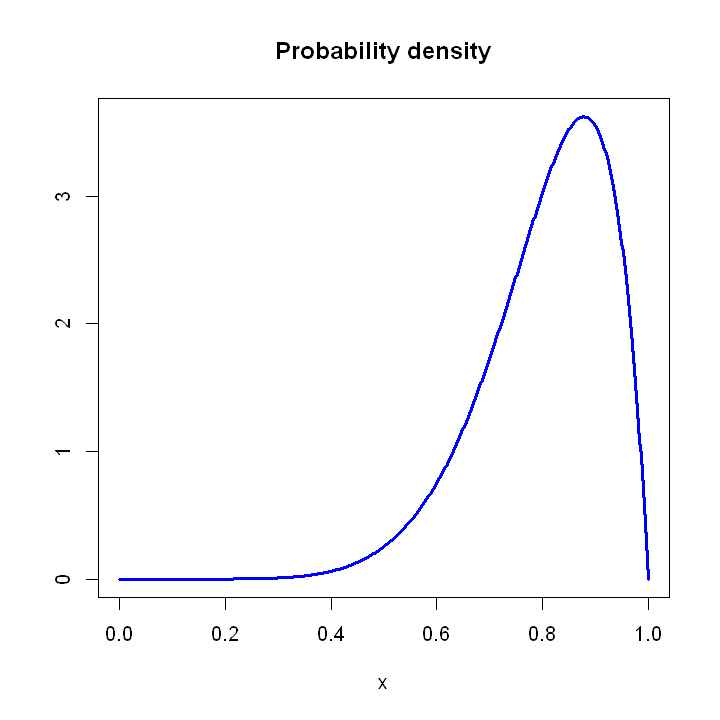

In [3]:
x<-seq(0,1,length=500)
y<-f(x,theta.hat.ML)
options(repr.plot.width=6,repr.plot.height=6)
plot(x,y,type="l",lwd=2.5,col="blue",main="Probability density",ylab="")

## Prior pdf

We propose a nonconjugate prior $\operatorname{Gamma}(\alpha,\beta)$. Its pdf, up to a constant factor, is:

$$
    h(\theta)\propto \theta^{\alpha-1}\,e^{-\beta\,\theta},
$$

and its logarithm:

$$
    \log h(\theta)= (\alpha-1)\,\log\theta-\beta\,\theta+\text{const.}
$$

## Log-post

We obtain the logarithm of the posterior pdf by _adding_ log-likelihood and $\log h(\theta)$. The result, **up to an additive constant,** is:

$$
    q(\theta)=(n+\alpha-1)\,\log\theta+n\log(\theta+1)+\theta\,(n\log G-\beta).
$$

## Laplace approximation

We approximate the posterior pdf on a neighbourhood of its mode $\theta_{0}$ (the MAP estimate of $\theta$) with a $\operatorname{N}(\mu,\sigma^2)$, where $\mu=\theta_{0}$ and $\sigma^2=\dfrac{1}{\left|\,q''(\theta_{0})\,\right|}$.

### Locate posterior mode

To locate $\theta_0$, we equate to zero the derivative:

$$
    q'(\theta)=\dfrac{n+\alpha-1}{\theta}+\dfrac{n}{\theta+1}+n\,\log G -\beta,
$$

which gives the quadratic equation:

$$
    \theta\,(\theta+1)\,(n\log G-\beta)+(\theta+1)\,(n+\alpha-1)+\theta\,n=0,
$$

or:

$$
    \theta^2\,(n\,\log G-\beta)+\theta\,(n\log G-\beta+\alpha+2n-1)+(n+\alpha-1)
$$

We do it for $\alpha=\beta=1$.

In [4]:
A<-function(nlG,alpha,beta){nlG-beta}
B<-function(n,nlG,alpha,beta){nlG-beta+alpha+2*n-1}
C<-function(n,alpha){n+alpha-1}
alpha<-1
beta<-1
A.1<-A(nlG,alpha,beta)
B.1<-B(n,nlG,alpha,beta)
C.1<-C(n,alpha)
p<-function(t){A.1*t^2+B.1*t+C.1}
R<-uniroot(p,c(0,12))
theta.0<-R$root
round(theta.0,4)

[1] 6.6904

### Second derivative

$$
    q''(\theta)=-\dfrac{n+\alpha-1}{\theta^2}-\dfrac{n}{(\theta+1)^2}
$$

In [5]:
abs.q2<-function(t){(n+alpha-1)/t^2+n/(t+1)^2}
round(abs.q2(theta.0),4)
sigma2<-1/abs.q2(theta.0)
round(sigma2,4)
sigma<-sqrt(sigma2)
round(sigma,4)

[1] 0.785

[1] 1.2739

[1] 1.1287

## Compare posterior pdf with its Laplace approximation

(to do this we need to normalize the posterior pdf)

In [6]:
# Integrate the nonnormalized density, then divide by the resulting normalization constant
logh<-function(t){(n+alpha-1)*log(t)+n*log(t+1)+(nlG-beta)*t}
nnh<-function(t){exp(logh(t))}
Z<-integrate(nnh,2,11)$value
h<-function(t){nnh(t)/Z}

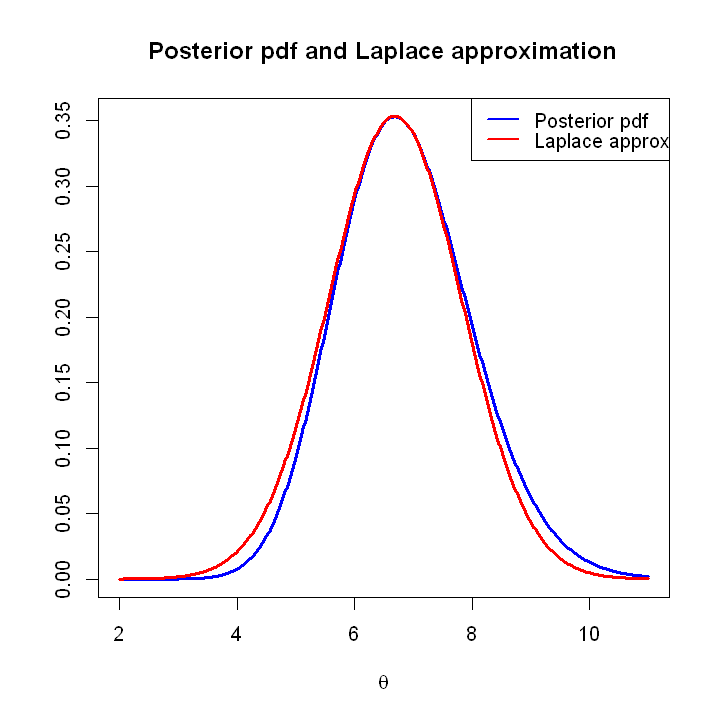

In [7]:
options(repr.plot.width=6,repr.plot.height=6)
u<-seq(2,11,length=500)
plot(u,h(u),"l",lwd=2.5,col="blue",main="Posterior pdf and Laplace approximation",ylab="",xlab=expression(theta))
lines(u,dnorm(u,mean=theta.0,sd=sigma),col="red",lwd=2.5)
legend("topright",legend=c("Posterior pdf","Laplace approx."),lwd=2.2,col=c("blue","red"))

# Case study 2: Rates of death from stomach cancer 

# A beta-binomial model for overdispersion

## Data

From Albert, J. (2009), _Bayesian computation with R (2nd ed),_ Springer, Chapter 5.

Data from males at risk in the age bracket 45–64 for the $n=20$ of the largest cities in Missouri. 

Each pair $(y_j,n_j)$ represents the number $y_j$ of cancer deaths out of the the number $n_j$ of individuals at risk.

$$
{\renewcommand{\arraystretch}{1.4}\begin{array}{|c|cccccccccc|}
	 \hline
    y_{j} &0  	&0  	&2  	&0  	&1  	&1  	&0  	&2  	&1  	&3 \\
	n_{j} &1083  	&855  	&3461   &657  	&1208  	&1025   &527  	&1668   &583   	&582\\
	 \hline\hline
	y_{j} &0  	&1  	&1  	&1 		&54  	&0  	&0  	&1  	&3  	&0\\
	n_{j} &917   &857   &680   	&917 	&53637  &874   	&395   	&581   	&588   	&383\\
	\hline
\end{array}}%
$$

In [8]:
#install.packages("LearnBayes",dependencies=TRUE,repos= "https://cloud.r-project.org")
require(LearnBayes,quietly=TRUE)

In [9]:
data(cancermortality)
str(cancermortality)

'data.frame':	20 obs. of  2 variables:
 $ y: int  0 0 2 0 1 1 0 2 1 3 ...
 $ n: int  1083 855 3461 657 1208 1025 527 1668 583 582 ...


In [10]:
y<-cancermortality$y
n<-cancermortality$n

### Notations: 

$$
    N=\sum_{i=1}^{k}n_{i},\mskip35mu Y=\sum_{i=1}^{k}y_{i},\mskip35mu f_{j}=\dfrac{y_{j}}{n_{j}},
    \mskip35mu w_{j}=\dfrac{n_{j}}{N},\mskip35mu 1\leq j\leq k.
$$

ML estimation of the $p$, the common probability of death, assuming homogeneous Binomial populations.

$$
    \widehat{p}_{ML}=\sum_{i=1}^{k}w_{i}\cdot f_{i} = \dfrac{Y}{N}.
$$

In [11]:
k<-length(y)
N<-sum(n)
Y<-sum(y)
f<-y/n
w<-n/N
p.hat.ML<-sum(f*w)
k
N
Y
round(f,4)
round(w,3)
# Estimation of a common p
round(p.hat.ML,6)

[1] 20

[1] 71478

[1] 71

[1] 0.0000 0.0000 0.0006 0.0000 0.0008 0.0010 0.0000 0.0012 0.0017 0.0052
[11] 0.0000 0.0012 0.0015 0.0011 0.0010 0.0000 0.0000 0.0017 0.0051 0.0000

[1] 0.015 0.012 0.048 0.009 0.017 0.014 0.007 0.023 0.008 0.008 0.013 0.012
[13] 0.010 0.013 0.750 0.012 0.006 0.008 0.008 0.005

[1] 0.000993

### Overdispersion

We compute the variance of these data: 

1. By assuming only $k$ observations $y_{j}$ with weights $w_{j}$, 
2. By assuming a Bernoulli or Binomial likelihood. In this second case there are two possibilities, depending on whether we assume or not a common probability for all $k$ binomials.

In any of these assumptions we find the raw empirical variance of the observed data is **much larger than what could be expected** if the model were indeed Binomial. 

Thus we are bound to discard the Binomial model and find another discrete distribution allowing for _overdisperse data_ such as these.

In [12]:
# Empirical expectation and variance (raw)
y.bar<-sum(w*y)
paste("Empirical expectation: ",round(y.bar,2))
#[1] 40.79601
s.y.2<-sum(w*(y-y.bar)^2)
paste("Empirical variance: ",round(s.y.2,2))
# Variance of observed mortality counts, assuming N Bernoulli r.v. with common p
Var.Bernoulli<-N*p.hat.ML*(1-p.hat.ML)
round(Var.Bernoulli,2)
# Variance of observed mortality counts, assuming k Binomials B(n_j,p_j), with weights w_j
Var.Binom.1<-sum(w*n*f*(1-f))
round(Var.Binom.1,2)
# Variance of observed mortality counts, assuming k Binomials B(n_j,p), with weights w_j
Var.Binom.2<-sum(w*n*p.hat.ML*(1-p.hat.ML))
round(Var.Binom.2,2)

[1] "Empirical expectation:  40.8"

[1] "Empirical variance:  524.36"

[1] 70.93

[1] 40.75

[1] 40.29

## Beta-Binomial model

We first met the Beta-Binomial distribution as the prior predictive distribution for a Binomial model with a Beta prior. 

It is  _a discrete distribution with support on the set of integers from 0 to $n$._ 

Its variance can be larger than that of the Binomial, depending on an additional parameter. We use it here as the likelihood for each observation $y_{i}$:

$$
	f(y\,|\,n,\alpha,\beta)=\binom{n}{y}\cdot
    \dfrac{\operatorname{B}(\alpha+y,\beta+n-y)}{\operatorname{B}(\alpha,\beta)}.
$$

where $\operatorname{B}(\,\cdot\,,\,\cdot\,)$ is a Beta function. 

Expectation and variance:
    
\begin{align*}
	\operatorname{E}(Y)&=n\cdot\dfrac{\alpha}{\alpha+\beta},\\
	\operatorname{var}(Y)&=n\cdot\dfrac{\alpha\beta}{(\alpha+\beta)^{2}}\cdot
	\dfrac{\alpha+\beta+n}{\alpha+\beta+1}.
\end{align*}

## Reparameterizations

Two usual reparameterizations of the Beta-Binomial pdf. Their goal is to have the expectation as a single parameter and, at the same time, to explicitly show expectation and variance in comparison with those of the Binomial. In both of them $\eta\in(0,1)$ has the meaning of a probability, as in the Binomial:

### Reparameterization (1)

$$
    \begin{array}{cl}
	\eta	&=\dfrac{\alpha}{\alpha+\beta}, \mskip40mu \rho=\dfrac{1}{(\alpha+\beta+1)},
    \mskip40mu \eta\in(0,1),\quad \rho\in(0,1),\\[0.3cm]
	\alpha	&=\eta\cdot\dfrac{1-\rho}{\rho},\quad \beta=(1-\eta)\cdot\dfrac{1-\rho}{\rho},\\[0.3cm]
	\operatorname{E}(Y)&=n\cdot\eta,\\[0.3cm]
	\operatorname{var}(Y)&=n\cdot\eta\cdot(1-\eta)\cdot[1+(n-1)\,\rho].
    \end{array}
$$

### Reparameterization (2)

$$
    \begin{array}{cl}
	K		&=\dfrac{1-\rho}{\rho}=\alpha+\beta, \mskip40mu \rho=\dfrac{1}{(K+1)},
    \mskip40mu \eta\in(0,1),\quad K\in(0,\infty),\\[0.3cm]
	\operatorname{E}(Y)&=n\cdot\eta,\\[0.3cm]
	\operatorname{var}(Y)&=n\cdot\eta\cdot(1-\eta)\cdot\dfrac{K+n}{K+1}.
    \end{array}
$$

### Beta-Binomial likelihood with the $(\eta,K)$ parameterization

$$
	f(y\,|\,n,\eta,K)=\binom{n}{y}\cdot
    \dfrac{\operatorname{B}(K\,\eta+y,K\,(1-\eta)+n-y)}{\operatorname{B}(K\,\eta,K\,(1-\eta))}.
$$


## Joint prior pdf

A possible non-informative prior (NIP) is:
	
$$
	g(\eta,K)\propto \dfrac{1}{\eta\cdot(1-\eta)}\cdot \dfrac{1}{(1+K)^{2}},
    \mskip40mu 0<\eta<1, \quad 0<K<\infty,
$$

the product of its marginals, hence we are assuming independent parameters. 

The reason why the $\eta$ marginal is an NIP becomes aparent with the following reparameterization, which transforms it into an improper uniform pdf on $\mathbb{R}$. 

It can be checked that the $K$ marginal is the result of transforming the uniform NIP $\rho\sim\operatorname{Unif}(0,1)$.

## Straightening out parameters

Transform $(\eta, K)$ to parameters $(\theta_{1},\theta_{2})$ defined on the whole $\mathbb{R}^2$ (as opposed to the region $[0,1]\times (0,\infty)$).

$$	
    \begin{array}{lcllcl}
	\theta_{1}&=&\operatorname{logit}(\eta)=\log\left(\dfrac{\eta}{1-\eta}\right),
	&\theta_{2}&=&\log(K),\\[0.3cm]
	\eta	&=&\dfrac{e^{\theta_{1}}}{1+e^{\theta_{1}}},
			&K	&=&e^{\theta_{2}}.
    \end{array}
$$

## Joint prior in terms of  $(\theta_{1},\theta_{2})$

Applying the change of variables for pdf's formula, we obtain the joint prior pdf in terms of the parameters $(\theta_{1},\theta_{2})$:

$$	
    \begin{array}{lcll}
	g_{\theta_{1}}(\theta_{1})	&=&1,&\mskip50mu \theta_{1}\in\mathbb{R},\\[0.3cm]
	g_{\theta_{1}}(\theta_{2})	&=&\dfrac{e^{\theta_{2}}}{(1+e^{\theta_{2}})^{2}},
    &\mskip50mu \theta_{2}\in\mathbb{R}.
    \end{array}
$$

### Exercise

Perform the change of variable computations used in the above prior pdf's, in particular verify the statements about the NIP nature of this prior pdf.

## Joint posterior pdf

Up to a proportionality constant (containing both the binomial coefficient and the $y$ marginal denominator, the joint posterior pdf of $(\eta,K)$, given the observed data $\mathbf{y}=(y_1,\dots,y_n)$, is:

$$
	g(\eta,K\,|\,\mathbf{y})\propto \dfrac{1}{\eta\cdot(1-\eta)}\cdot \dfrac{1}{(1+K)^{2}}\cdot
    \prod_{i=1}^{k}\dfrac{\operatorname{B}(K\,\eta+y_i,K\,(1-\eta)+n_i-y_i)}{\operatorname{B}(K\,\eta,K\,(1-\eta))}.
$$

Now we follow closely the computations described in Chapter 5 of Jim Albert's book, implemented in the `LearnBayes` package, using such functions as `betabinexch0` (compute the posterior pdf in the $(\eta,K)$ parameterization), `mycontour` (an adaptation of the default `contour` function provided by R) `betabinexch` (compute the posterior pdf in the $(\theta_1,\theta_2)$ parameterization), and `laplace` (multivariate Laplace approximation) and code chunks `LearnBayes::Chapter.5.4` and `LearnBayes::Chapter.5.6` shown in the Code demos section.

The `betabinexch0` function implements the above expression:

```
betabinexch0<-function (theta, data){
    eta <- theta[1]
    K <- theta[2]
    y <- data[, 1]
    n <- data[, 2]
    N <- length(y)
    logf <- function(y, n, K, eta) lbeta(K * eta + y, K * (1 - 
        eta) + n - y) - lbeta(K * eta, K * (1 - eta))
    val <- sum(logf(y, n, K, eta))
    val <- val - 2 * log(1 + K) - log(eta) - log(1 - eta)
    return(val)
    }
```

The first step is to visualize this joint posterior pdf:

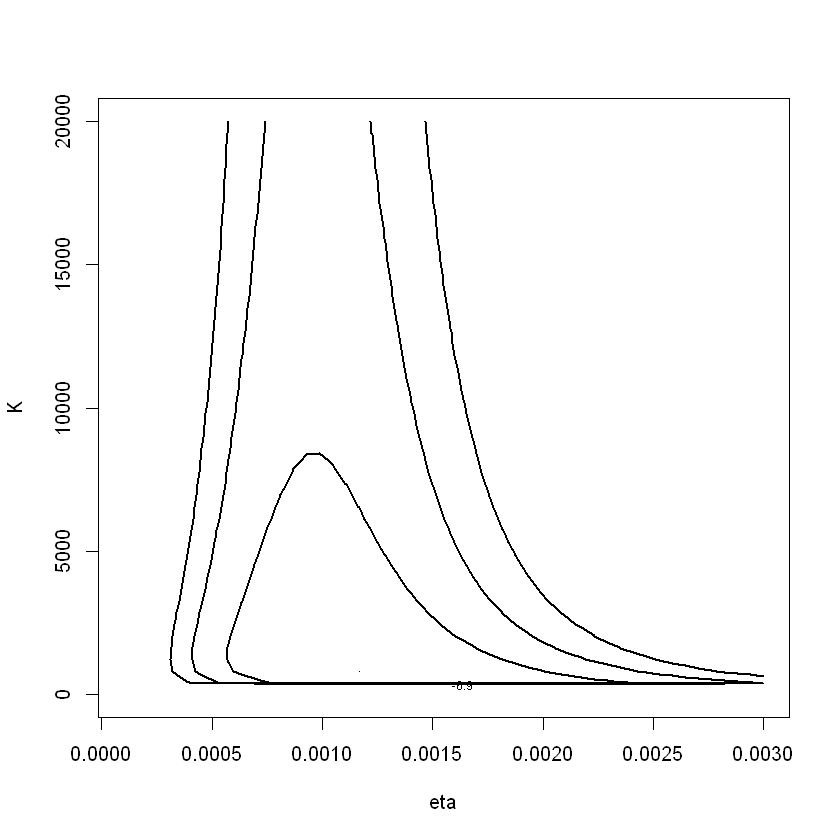

In [13]:
options(repr.plot.width=7,repr.plot.height=7)
mycontour(betabinexch0,c(.0001,.003,1,20000),cancermortality,xlab="eta",ylab="K")

We observe the strong skewness of the distribution, especially towards large $K$ values. This right-skewness is a common characteristic of the likelihood function of a precision ro variance parameter, with support on $(0,\infty)$.

We transform the joint posterior pdf to the new variables $(\theta_1,\theta_2)$ defined above. The result is:

$$
	g(\theta_1,\theta_2\,|\,\mathbf{y})=g(\eta(\theta_1),K(\theta_2)\,|\,\mathbf{y})\cdot
    \dfrac{e^{\theta_1+\theta_2}}{(1+e^{\theta_1})^2}
$$

##### Exercise

Perform the change of variable computations used in the above posterior pdf.

#### Joint posterior pdf in terms of  $(\theta_1,\theta_2)$

The `betabinexch`implements this parameterization of the joint posterior pdf. We use it to visualize it.

```
betabinexch<-function (theta, data){
    eta<-exp(theta[1])/(1+exp(theta[1]))
    K<-exp(theta[2])
    y<-data[, 1]
    n<-data[, 2]
    N<-length(y)
    logf<-function(y,n,K,eta) lbeta(K*eta+y,K*(1-eta)+n-y)-lbeta(K*eta,K*(1-eta))
    val<-sum(logf(y,n,K,eta))
    val<- val+theta[2]-2*log(1+exp(theta[2]))
    return(val)
    }
```

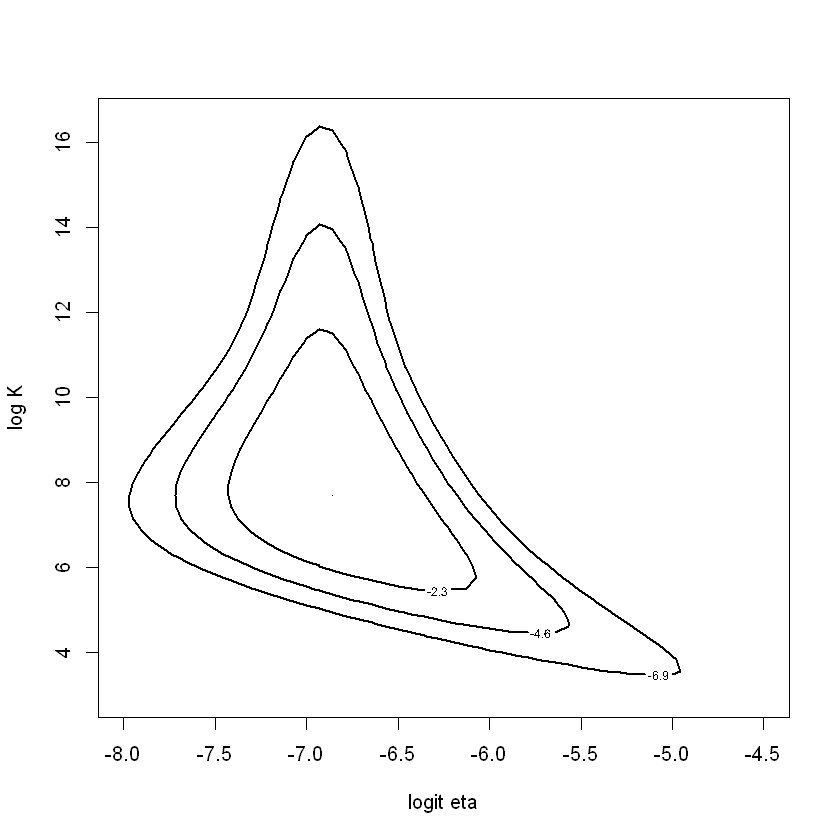

In [14]:
options(repr.plot.width=7,repr.plot.height=7)
mycontour(betabinexch,c(-8,-4.5,3,16.5),cancermortality,xlab="logit eta",ylab="log K")

## Laplace approximation

The `laplace` function in the `LearnBayes` package implements it:

```
laplace<-function (logpost,mode,...){
    options(warn = -1)
    fit<-optim(mode, logpost, gr = NULL, ..., hessian = TRUE,control = list(fnscale = -1))
    options(warn = 0)
    mode<-fit$par
    h<- -solve(fit$hessian)
    p<-length(mode)
    int<-p/2 * log(2 * pi) + 0.5 * log(det(h)) + logpost(mode, ...)
    stuff = list(mode = mode, var = h, int = int, converge = fit$convergence == 0)
    return(stuff)
    }
```

The function optimizes the input `logpost` function, the logarithm of a joint posterior, locating its mode. Then it returns this mode together with the inverse matrix of the second derivative (Hessian) at this mode, which will become the matrix of variances and covariances of the approximating normal pdf.

In [15]:
# The second argument to this function is an initial guess for the mode
fit=laplace(betabinexch,c(-7,6),cancermortality)
fit

0.07896568,-0.1485087
-0.14850874,1.3483208


Next we visualize the contour lines of the (logarithm of the) bivariate normal pdf with expectation equal to the `mode` and variance equal to the `var` obtained from the `laplace` function.

There are several implementations of the multivariate normal pdf in R. The most common is in the `mvtnorm` package. Here we follow Jim Albert's text, using his implementation `lbinorm` of the logarithm of the bivariate normal pdf.

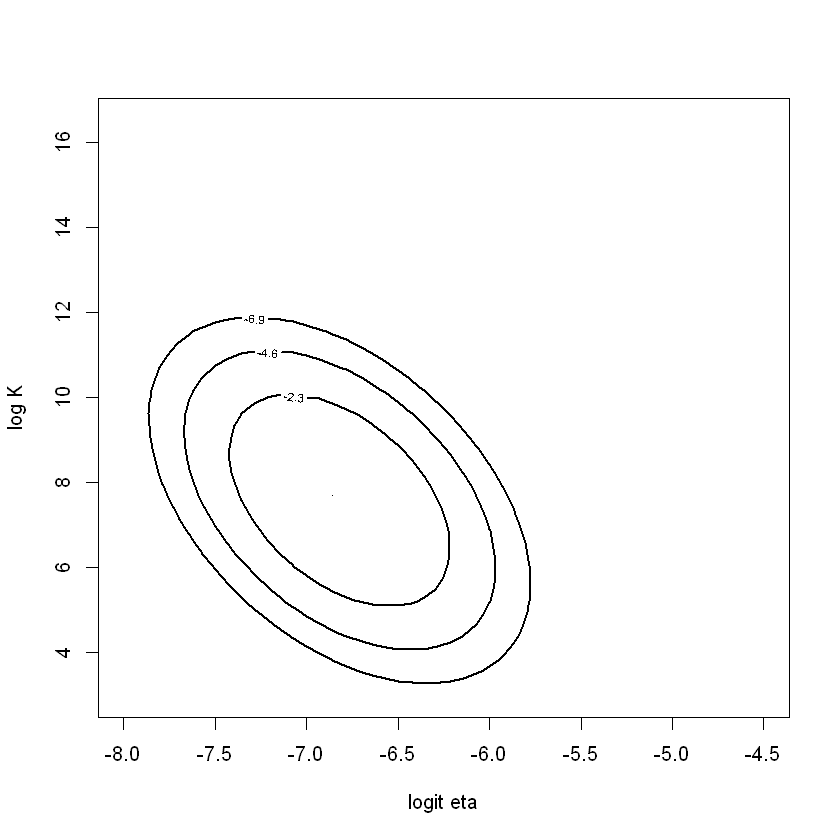

In [16]:
npar<-list(m=fit$mode,v=fit$var)
options(repr.plot.width=7,repr.plot.height=7)
mycontour(lbinorm,c(-8,-4.5,3,16.5),npar,xlab="logit eta", ylab="log K")

## Using the Laplace approximation

We take advantage of the results to obtain approximate 90% posterior credible intervals for $\theta_1=\operatorname{logit}(\eta)$ and $\theta_2=\log K$:

In [17]:
# variances of the components of a bivariate normal vector are in the diagonal of the covariance matrix
se<-sqrt(diag(fit$var))
a<-qnorm(0.95)           # 5% probability on each tail
left.bound<-fit$mode-a*se
right.bound<-fit$mode+a*se
round(left.bound,4)
round(right.bound,4)

[1] -7.2820  5.6662

[1] -6.3576  9.4861